<a href="https://colab.research.google.com/github/amargauge26/lieanerreg_housingprice/blob/main/learnregreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


import pandas as pd
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ruchi798/housing-prices-in-metropolitan-areas-of-india")

print("Path to dataset files:", path)


# List files in the downloaded dataset directory
print("Files in the dataset directory:")
print(os.listdir(path))

# Assuming the CSV file is the only file in the directory or the first CSV file
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
    csv_file = os.path.join(path, csv_files[0])
    df = pd.read_csv(csv_file)

    # Display basic information about the dataset
    print("\nDataset Information:")
    print(df.info())

    # Show first few rows
    print("\nFirst 5 rows:")
    print(df.head())
else:
    print("No CSV file found in the dataset directory.")


Path to dataset files: /root/.cache/kagglehub/datasets/ruchi798/housing-prices-in-metropolitan-areas-of-india/versions/4
Files in the dataset directory:
['Chennai.csv', 'Hyderabad.csv', 'Delhi.csv', 'Bangalore.csv', 'Kolkata.csv', 'Mumbai.csv']

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                5014 non-null   int64 
 1   Area                 5014 non-null   int64 
 2   Location             5014 non-null   object
 3   No. of Bedrooms      5014 non-null   int64 
 4   Resale               5014 non-null   int64 
 5   MaintenanceStaff     5014 non-null   int64 
 6   Gymnasium            5014 non-null   int64 
 7   SwimmingPool         5014 non-null   int64 
 8   LandscapedGardens    5014 non-null   int64 
 9   JoggingTrack         5014 non-null   int64 
 10  RainWaterHarvesting  5014 non-nul

In [ ]:
df.head(10)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
5,2950000,576,Mevalurkuppam,1,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
6,7600000,1207,Kolapakkam,3,0,0,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
7,2234000,604,Kundrathur,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5521000,986,Pammal,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,6321000,1345,Puzhal,3,0,0,1,1,1,0,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
print(df.columns)


Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')


In [ ]:
# Remove any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Now try filtering the columns again
df_main = df[['Area','Location', 'Price','No. of Bedrooms']]

# Display the filtered DataFrame
print(df_main.head())


   Area        Location     Price  No. of Bedrooms
0  1310   Perungalathur   5500000                3
1  1126      Madhavaram   5350000                2
2  1307      Karapakkam   8205000                3
3  3600  Thiruvidandhai  23400000                3
4  1700  Iyappanthangal  10100000                3


In [ ]:
# Check for null values in the dataset
null_values = df_main.isnull().sum()
print("Null Values:\n", null_values)


Null Values:
 Area               0
Location           0
Price              0
No. of Bedrooms    0
dtype: int64


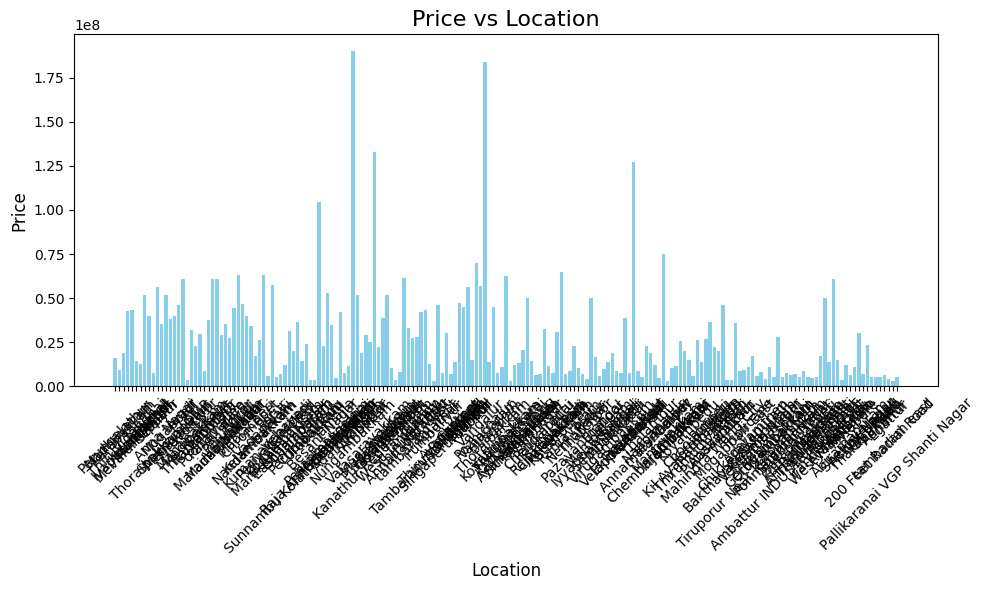

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
plt.bar(df['Location'], df['Price'], color='skyblue')
plt.title('Price vs Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
max_price_per_location = df_main.groupby('Location')['Price'].max()

In [ ]:
max_price_per_location

,Price
Location,
200 Feet Radial Road,5285000
Abiramapuram,6704000
Adambakkam,11700000
Adhanur,6500000
Adyar,63200000
...,...
Virugambakkam,19000000
West Mambalam,61100000
West Tambaram,8131000


,Area,Price,No. of Bedrooms,Location_Abiramapuram,Location_Adambakkam,Location_Adhanur,Location_Adyar,Location_Agaramthen,Location_Alandur,Location_Alwarpet,...,Location_Vellakkal,Location_Vengaivasal,Location_Vengambakkam,Location_Vettuvankani,Location_Villivakkam,Location_Virugambakkam,Location_West Mambalam,Location_West Tambaram,Location_tambaram east,Location_tambaram west
0,1310,5500000,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1126,5350000,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1307,8205000,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3600,23400000,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1700,10100000,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5009,1599,7834999,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5010,740,2408000,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5011,1700,5500000,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5012,1599,3400000,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = df.drop('Price',axis=1)
y= df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [ 5.42410823e+03 -7.37973743e+05  2.98023224e-08  1.99895705e+06
  7.36852888e+05  8.70692121e+06 -6.48107327e+05  5.93083471e+06
  1.41441707e+07  1.18238789e+05 -1.64588695e+06  1.51563905e+07
  3.65868397e+06  7.65032598e+06 -1.54379009e+06  5.69301575e+05
 -2.45066842e+05  2.95984265e+06  2.45059228e+07  3.59223247e+06
  3.19348331e+05 -9.25564718e+05 -9.84140854e+06 -6.04670413e+05
  2.75994409e+06  1.39016203e+07  1.82539225e-07 -1.73560295e+06
 -8.78126311e+04  9.52058465e+06  4.05227675e+06  1.08721721e+06
 -1.14148192e+06  3.00280980e+06  1.24994099e+06  1.16663591e+06
 -3.68343788e+06  1.37835741e-07  1.32329520e+07 -1.17884830e+06
  1.59000000e+05  4.90466298e+06  1.08845576e+07  3.35990123e+05
  5.42655988e+05  3.34267056e+06  4.24368166e+06  1.07102096e-07
 -1.00545099e+06  1.14940534e+06  6.84608780e+04  1.07714317e+06
  2.06064699e+06  5.00817631e+06  1.61205841e+06 -4.09379862e+05
  1.23116330e+06  5.84669548e+05  1.35513809e+06 -5.22361588e+05
  2.7

In [ ]:
from sklearn.metrics import r2_score, root_mean_squared_error

# Evaluate model
y_pred = model.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):,.2f}")


R² Score: 0.24
RMSE: 10,346,577.53
